In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axisartist.axislines import SubplotZero
from scipy.integrate import simpson
from sympy import solve, Poly, Eq, Function, exp, symbols
import math
import seaborn as sns

Figure 15.1: Direct photodissociation and the reflection principle

In [32]:
def potentials(D_e, b, r, r_e):
    q = r-r_e
    V_morse = D_e*(1-np.exp(-b*q))**2-D_e
    V_anti = (D_e/2)*(np.exp(-0.5*b*(q+0.2))+2*np.exp(-b*(q+0.2)))
    return V_morse, V_anti

def gauss(sigma, x, mu):
    y = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)
    return y

In [4]:
r_e = 1.5
r = np.linspace(0, 4, 1000)
D_e = 10**(-3)
b = 1.75

V_morse, V_anti = potentials(D_e, b, r, r_e)

In [43]:
x = np.linspace(-0.3, 0.3, 1000)
mu = 0
sigma = 0.12

psi_squared = gauss(sigma, x, mu)

In [41]:
trans_prob = gauss(sigma, r, 1)*1/V_anti
print(simpson(trans_prob))
trans_prob /= simpson(trans_prob,r)
print(simpson(trans_prob))

108340.2991153993
249.75000000000003


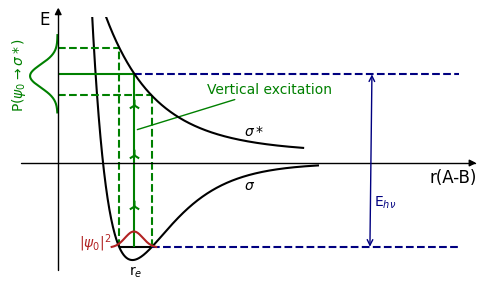

In [164]:
fig = plt.figure(figsize = (5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Potential energy profiles
ax.plot(r-0.5, V_morse, color = 'k')
ax.plot(r-0.7, V_anti+0.1*D_e, color = 'k', zorder = 10)
ax.text(2.5, V_morse[650], r'$\sigma$', fontsize = 10)
ax.text(2.5, V_anti[630], r'$\sigma*$', fontsize = 10)

# Ground-state wavefunction
ax.plot(x+1.02, (psi_squared/20000)-8.72*10**(-4), color = 'firebrick', zorder = 10)
ax.hlines(V_morse[330], r[330]-0.5, r[440]-0.5, color = 'k')
ax.text(0.95, -1.15*10**(-3), r'r$_{e}$', fontsize = 10)
ax.text(0.28, V_morse[330], r'$|\psi_{0}|^{2}$', color = 'firebrick', fontsize = 10)

# Probability
ax.plot(-trans_prob[150:350][::-1]/9-0.01, (r[150:350]-1)/1000+V_anti[410], color = 'g')
ax.text(-0.65, V_anti[410], r'P($\psi_{0}\rightarrow\sigma*$)', fontsize = 10, color = 'g', rotation = 90, va = 'center')

# Vertical excitation
ax.vlines(1.02, V_morse[330], V_anti[410], color = 'g')
ax.hlines(V_anti[410], 0, 1.02, color = 'g')
ax.vlines(r[330]-0.5, V_morse[330], V_anti[365], ls = '--', color = 'g', zorder = -10)
ax.hlines(V_anti[365], 0, r[330]-0.5, ls = '--', color = 'g')
ax.vlines(r[440]-0.5, V_morse[330], V_anti[460], ls = '--', color = 'g')
ax.hlines(V_anti[460], 0, r[440]-0.5, ls = '--', color = 'g')
ax.annotate('Vertical excitation', xy = (1.03, V_morse[265]), xytext = (2, V_morse[255]), arrowprops=({'arrowstyle': '-', 
                                        'lw': 1, 'color':'g'}), color = 'g', fontsize = 10)

ax.scatter(1.02, V_morse[295], marker = '2', color = 'g', s = 70)
ax.scatter(1.02, V_morse[273], marker = '2', color = 'g', s = 70)
ax.scatter(1.02, V_morse[258], marker = '2', color = 'g', s = 70)

# Energy of photon
ax.hlines(V_morse[330], r[440]-0.5, 5.4, color = 'navy', ls = '--')
ax.hlines(V_anti[410], 1.02, 5.4, color = 'navy', ls = '--')
ax.annotate(' ', xy = (4.2, V_morse[334]), xytext = (4.2, V_anti[395]), arrowprops=({'arrowstyle': '<->', 
                        'lw': 1, 'color':'navy'}))
ax.text(4.25, V_morse[295], r'E$_{h\nu}$', color = 'navy', fontsize = 10)

ax.set_ylim(-1.1*10**(-3), 1.5*10**(-3))
ax.set_xlim(-0.5, 5.5)

ax.text(5, V_morse[700], 'r(A-B)', fontsize = 12)
ax.text(-0.25, 1.43*10**(-3), 'E', fontsize = 12)

plt.tight_layout()
plt.savefig('Reflection.png', dpi = 150)
plt.show()

Figure 15.4a: Vertical transition to a bound state

Figure 15.4b: Graphical depiction of the Frank-Condon overlap integrals

In [546]:
def wavefunction_harmonic(y, v):
    if v==0:
        H = 1
    if v==1:
        H = 2*y
    if v==2:
        H = 4*y**2 - 2
    if v==3:
        H = 8*y**3 - 12*y
    if v==4:
        H = 16*y**4 - 48*y**2 + 12
    if v==5:
        H = 32*y**5 - 160*y**3 + 120*y
    psi =  H*np.exp(-(y**2)/2)
    a = simpson(psi**2, y)
    return (1/np.sqrt(a))*H*np.exp(-(y**2)/2)

def morse(D_e, b, r, r_e):
    q = r-r_e
    V_morse = D_e*(1-np.exp(-b*q))**2-D_e
    return V_morse

def energy_levels(levels, anharmonicity, E_scale, D_e, b, r_e, y, psi_scale):
    energy_levels = []
    distance = []
    psi = []
    x_values = []
    for v in range(levels+1):
        E_v = ((v+0.5)*0.37-((v+0.5)**2)*0.37*anharmonicity)*E_scale # hbar*(k_f/mu)**1/2 = 0.37 eV, assuming H-Cl bond
        energy_levels.append(E_v)
        r = symbols('r')
        dist = solve(D_e*(1-exp(-b*(r-r_e)))**2-E_v)
        distance.append(dist)
        # xmax = float(dist[1] - dist[0])
        # xmin = -xmax
        # x = np.linspace(-xmin, xmax, 1000)
        wave = wavefunction_harmonic(y, v)*psi_scale + E_v
        psi.append(wave[::-1])
        x_val = np.linspace(float(dist[0])-0.15, float(dist[1])+0.15, 1000)
        x_values.append(x_val)
    distance_array = np.array(distance)
    x_array = np.array(x_values)
    psi_array = np.array(psi)
    return energy_levels, distance_array, x_array, psi_array

In [488]:
De = 3
b_ground = 1
b_excited = 0.75
re_ground = 1
re_excited = 1.8

x_ground = np.linspace(0.1, 5, 1000)
morse_ground = morse(De, b_ground, x_ground, re_ground) + 0.05
x_excited = np.linspace(0.75, 5.5, 1000)
morse_excided = morse(De+0.4, b_excited, x_excited, re_excited) + 3.5

In [554]:
alpha = 0.11 # unit: Å, alpha = ((hbar**2)/(mu*k_f))**1/4, assuming H-Cl bond
y = np.linspace(-0.47, 0.47, 1000)/alpha
y_ground = np.linspace(-0.4, 0.4, 1000)/alpha

energies, distance_array, x_array, psi_array = energy_levels(5, 0.02, 1.8, De+0.4, b_excited, re_excited, y, 0.65)
E_g, dist_g, x_g, psi_g = energy_levels(0, 0.02, 1.8, De, b_ground, re_ground, y_ground, 0.65)
levels = [r'v$_{0}$', r'v$_{1}$', r'v$_{2}$', r'v$_{3}$', r'v$_{4}$', r'v$_{5}$']

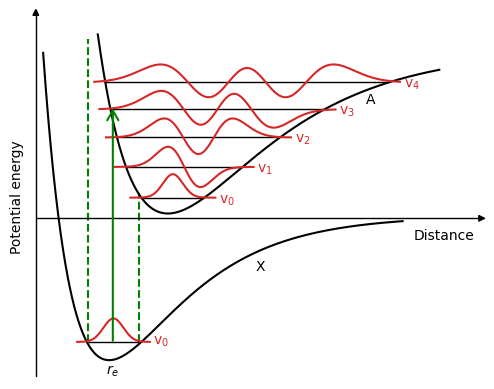

In [577]:
fig = plt.figure(figsize = (5,4))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x_ground, morse_ground, color = 'k')
ax.plot(x_excited[20:], morse_excided[20:], color = 'k')

ax.hlines(E_g[0] - 2.9, dist_g[0][0], dist_g[0][1], lw = 1, color = 'k', zorder = -10)
ax.plot(x_g[0], psi_g[0] - 2.9, color = 'tab:red')
ax.text(dist_g[0][1] + 0.2, E_g[0] - 2.9, levels[0], va = 'center', ha = 'left', color = 'tab:red')

for n in range(len(energies)-1):
    ax.hlines(energies[n] + 0.1, distance_array[n][0], distance_array[n][1]-0.01, lw = 1, color = 'k', zorder = -10)
    ax.plot(x_array[n], psi_array[n] + 0.1, color = 'tab:red')
    ax.text(distance_array[n][1] + 0.2, energies[n] + 0.05, levels[n], va = 'center', ha = 'left', color = 'tab:red')

ax.annotate(' ', xy = (1.05, energies[3] + 0.175), xytext = (1.02, E_g[0] - 3.22), 
            arrowprops=({'arrowstyle': '->, head_width = 0.4, head_length = 0.7', 'lw': 1.5, 'color': 'g'}))
ax.vlines(dist_g[0][1], E_g[0] - 2.9, energies[0] + 0.2, color = 'g', ls = '--', zorder = -10)
ax.vlines(dist_g[0][0], E_g[0] - 2.9, energies[4] + 1, color = 'g', ls = '--', zorder = -10)

ax.text(1.05, min(morse_ground) - 0.3, r'$r_{e}$', ha = 'center')
ax.text(3, morse_ground[500], 'X')
ax.text(4.5, morse_excided[700], 'A')

ax.set_xlim(0, 6)

ax.set_ylabel('Potential energy')
ax.text(5.15, -0.45, 'Distance', fontsize = 10)

plt.tight_layout()
plt.savefig('FCa.png', dpi = 150)
plt.show()

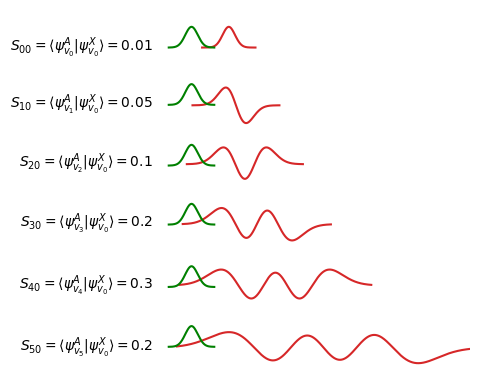

In [608]:
overlaps = [r'$S_{00}=\langle\psi_{v_{0}}^{A}|\psi_{v_{0}}^{X}\rangle=0.01$',
            r'$S_{10}=\langle\psi_{v_{1}}^{A}|\psi_{v_{0}}^{X}\rangle=0.05$',
            r'$S_{20}=\langle\psi_{v_{2}}^{A}|\psi_{v_{0}}^{X}\rangle=0.1$',
            r'$S_{30}=\langle\psi_{v_{3}}^{A}|\psi_{v_{0}}^{X}\rangle=0.2$',
            r'$S_{40}=\langle\psi_{v_{4}}^{A}|\psi_{v_{0}}^{X}\rangle=0.3$',
            r'$S_{50}=\langle\psi_{v_{5}}^{A}|\psi_{v_{0}}^{X}\rangle=0.2$']
x_max = max(x_array[-1])

fig, ax = plt.subplots(1,1, figsize = (5, 4))

for n in range(len(energies)):
    # ax.hlines(energies[n] + 0.1, distance_array[n][0], distance_array[n][1]-0.01, lw = 1, color = 'k', zorder = -10)
    ax.plot(x_array[n], psi_array[n] - 2*n, color = 'tab:red')
    ax.text(dist_g[0][0]-0.5, energies[n] - 2*n, overlaps[n], va = 'center', ha = 'right')
    if n < 2:
        ax.plot(x_g[0], psi_g[0] - 1.35*n, color = 'g')
    if 1 < n < 4:
        ax.plot(x_g[0], psi_g[0] - 1.39*n, color = 'g')
    if n > 3:
        ax.plot(x_g[0], psi_g[0] - 1.41*n, color = 'g')
    # ax.text(distance_array[n][1] + 0.2, energies[n] + 0.05, levels[n], va = 'center', ha = 'left', color = 'tab:red')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

ax.set_xlim(-0.3*x_max, x_max)

plt.tight_layout()
plt.savefig('FCb.png', dpi = 150)
plt.show()

Figure 15.4c: The Franck-Condon progression of peaks spaced by the separation of the vibrational energy levels in the excited state.

In [160]:
kT = 207

def gauss(a, x, mu, sigma):
    g = a*np.exp(-0.5*(x-mu)**2/sigma**2)
    return g

def intensities(B, n_list, nu, pop_list, x, sigma):
    DeltaE_R = []
    R_branch = []
    
    for n in n_list:
        if (n % 2) == 0:
            DeltaE_R.append(nu + n*B)
            J = int(n/2)
            R_branch.append((((J+1)/(2*J+1))*pop_list[J-1])/np.sum(pop_list))
        
        else:
            DeltaE_R.append(nu + n*B)
            R_branch.append(0)
    branch = np.array(R_branch)/np.sum(pop_list)
    intensity = pd.DataFrame(np.array([branch]).T, index = DeltaE_R, columns = ['intensity'])

    y = np.zeros_like(x, dtype = np.float64)
    for (wavenumber, int1) in zip(intensity.index.values, intensity['intensity']):
        y += gauss(int1, x, wavenumber, sigma)

    return y

In [161]:
B = 4
n_list = np.arange(1, 18)
population = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.04, 0.025, 0.01])
wave = np.linspace(200, 275, 1000)
nu = 200
sigma = 2

spec = intensities(B, n_list, nu, population[::-1], wave, sigma)

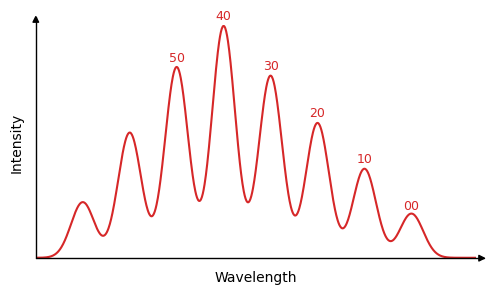

In [162]:
fig = plt.figure(figsize = (5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(wave-200, spec+0.001, color = 'tab:red')

ax.set_xlim(min(wave)-200, max(wave)-200)
ax.set_ylim(0, max(spec)+0.003)

ax.text(64, 0.11, '00', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)
ax.text(56, 0.22, '10', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)
ax.text(48, 0.33, '20', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)
ax.text(40, 0.44, '30', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)
ax.text(32, 0.559, '40', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)
ax.text(24, 0.46, '50', ha = 'center', va = 'bottom', color = 'tab:red', fontsize = 9)

ax.set_xlabel('Wavelength')
ax.set_ylabel('Intensity')

plt.tight_layout()
plt.savefig('FCc.png', dpi = 150)
plt.show()